# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [13]:
import tensorflow as tf

## Get the dataset

In [14]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [15]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [16]:
# Pre processing 
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(8000, 28, 28)

## Visualize the dataset
Print some images with labels.

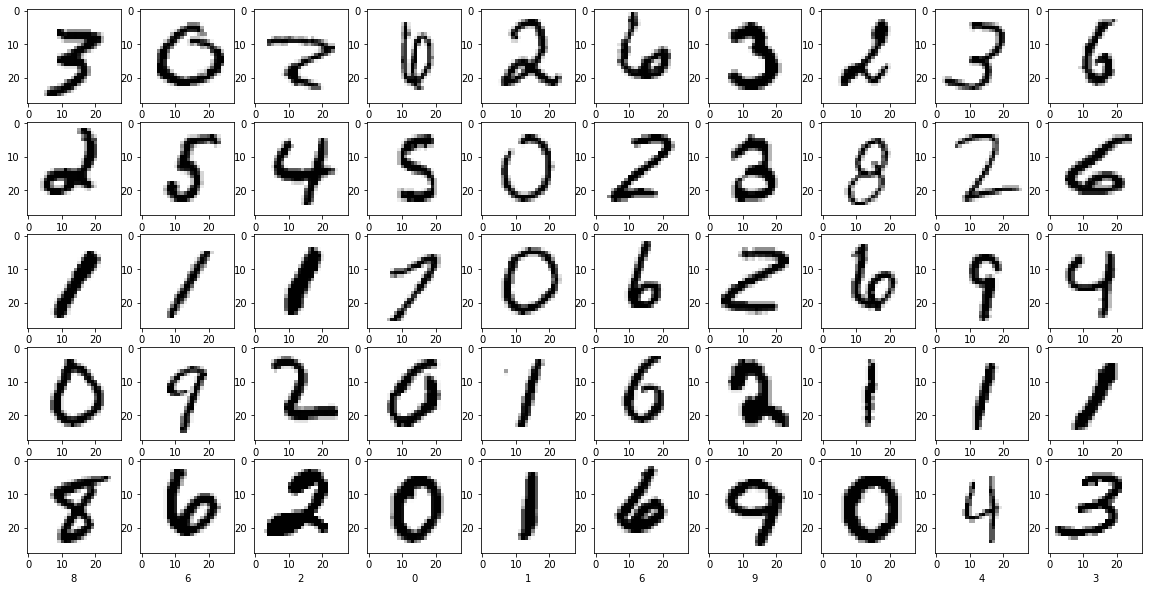

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    # plt.xticks([])
    # plt.yticks([])
    # plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()

# Your code

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

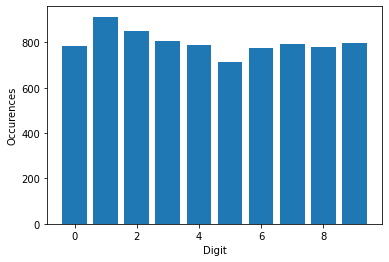

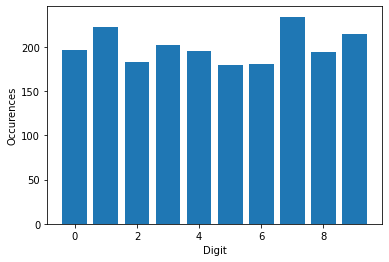

In [18]:
import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)
plt.bar(unique,counts)
plt.xlabel('Digit')
plt.ylabel('Occurences')
plt.show()
unique, counts = np.unique(Y_test, return_counts=True)
plt.bar(unique,counts)
plt.xlabel('Digit')
plt.ylabel('Occurences')
plt.show()

# Your code

## Model

In [19]:
# model building

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
model = tf.keras.Sequential([
  # tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
])

In [20]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Fit the model on the training data (specify validation_split, read about validation if new to you)
history = model.fit(X_train,Y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4453 - accuracy: 0.8603 - val_loss: 0.1573 - val_accuracy: 0.9513
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.1087 - accuracy: 0.9673 - val_loss: 0.1410 - val_accuracy: 0.9594
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0672 - accuracy: 0.9783 - val_loss: 0.1251 - val_accuracy: 0.9625
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0698 - val_accuracy: 0.9769
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0317 - accuracy: 0.9883 - val_loss: 0.0632 - val_accuracy: 0.9812
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0272 - accuracy: 0.9894 - val_loss: 0.0766 - val_accuracy: 0.9744
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0717 - val_accuracy: 0.9844
Epoch 

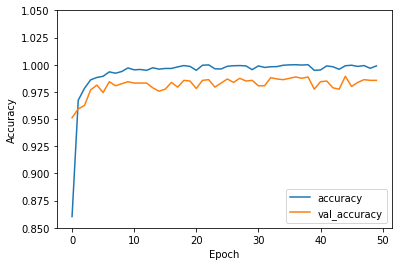

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.85, 1.05])
plt.legend(loc='lower right')

## Predict some images
Print the image along with its label (true value) and predicted value.

In [41]:
# Your code
y_pred = model.predict(X_test)
y_pred.shape

(2000, 10)

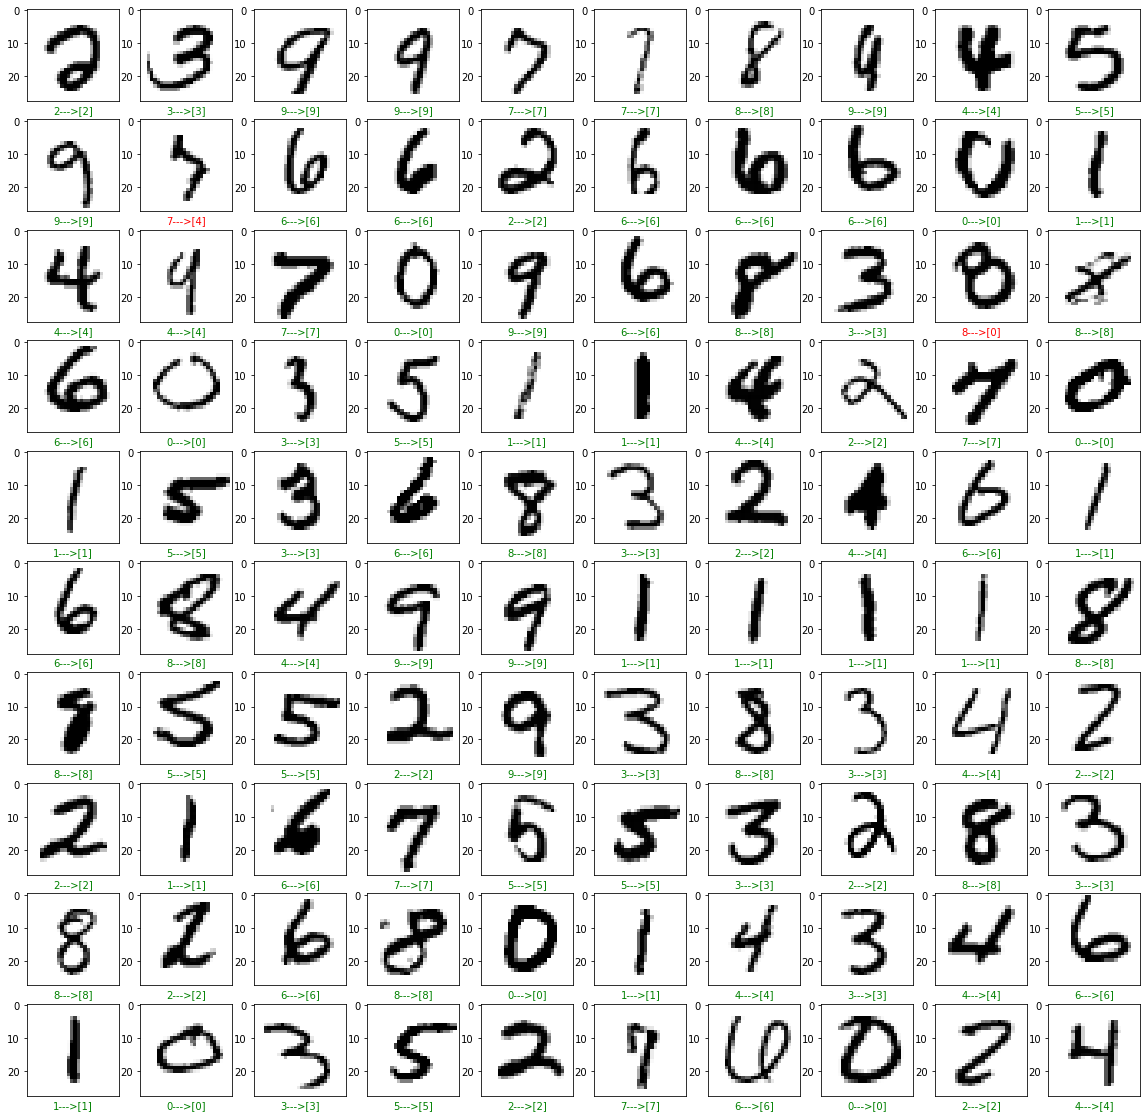

In [62]:
arr=[]
for i in range(2000):
  n=np.where(y_pred[i]==max(y_pred[i]))
  arr.append(n)
# Your code
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    if(Y_test[i]==arr[i][0]):
      plt.xlabel(f"{Y_test[i]}--->{arr[i][0]}",color='g')
    else:
      plt.xlabel(f"{Y_test[i]}--->{arr[i][0]}",color='r')